pip install xgboost\
pip install --upgrade xgboost

In [1]:
import xgboost as xgb

In [4]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [5]:
data = load_boston()

In [6]:
x = data.data
y = data.target

In [7]:
Xtrain, Xtest, Ytrain, Ytest = TTS(x,y,test_size=0.3,random_state=420)

In [8]:
reg = XGBR(n_estimators=100).fit(Xtrain,Ytrain)

In [9]:
reg.predict(Xtest)

array([ 6.6689262, 22.34918  , 31.052807 , 13.911595 ,  9.467966 ,
       22.658588 , 14.514282 , 15.092699 , 15.293644 , 12.680115 ,
       24.140797 , 35.890083 , 21.573483 , 27.07066  , 19.052658 ,
        9.89033  , 23.386076 , 23.588493 , 23.311466 , 22.401644 ,
       18.98444  , 15.766946 , 25.8352   , 20.193802 , 19.982517 ,
       15.611423 , 22.883228 , 29.838228 , 22.815304 , 16.779037 ,
       37.13194  , 20.133305 , 19.67352  , 23.525528 , 22.845137 ,
       23.87397  , 15.17887  , 23.45934  , 16.685331 , 31.761686 ,
       18.525843 , 22.441063 , 38.48728  , 17.93719  , 15.10122  ,
       28.980541 , 46.363487 , 12.842797 ,  9.618281 , 35.40579  ,
       25.657566 , 20.605602 , 20.800055 , 49.228447 , 31.355848 ,
       29.382515 , 18.911947 , 21.049877 , 16.165182 , 18.098577 ,
       14.659002 , 21.720213 , 19.413454 , 28.932102 , 30.573524 ,
       19.228426 , 20.531511 , 15.666289 , 23.52929  , 19.30554  ,
       28.384985 , 42.83562  , 29.429724 , 23.306015 , 19.7412

In [10]:
reg.score(Xtest,Ytest)

0.9050988968414799

In [11]:
MSE(Ytest,reg.predict(Xtest))

8.830916343629323

In [12]:
reg.feature_importances_

array([0.01902167, 0.0042109 , 0.01478316, 0.00553537, 0.02222196,
       0.37914088, 0.01679686, 0.0469872 , 0.04073574, 0.05491759,
       0.06684221, 0.00869464, 0.3201119 ], dtype=float32)

In [14]:
reg1 = XGBR(n_estimators=100)

In [15]:
CVS(reg1,Xtrain,Ytrain,cv=5)

array([0.83123948, 0.77538516, 0.82292472, 0.81418649, 0.75379556])

In [16]:
xgb_cvs = CVS(reg1,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error')

In [20]:
xgb_cvs.mean()

-16.215644229762717

In [18]:
rfr = RFR(n_estimators=100)
rfr_cvs = CVS(rfr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error')

In [21]:
rfr_cvs.mean()

-16.161696515573446

In [22]:
lr = LinearR()
lr_cvs = CVS(lr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error')

In [23]:
lr_cvs.mean()

-25.3495074936485

In [24]:
reg2 = XGBR(n_estimators=100,silent=False)
CVS(reg2,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

[13:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:46:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false

-16.215644229762717

In [27]:
def plot_learning_curve(estimator,title, x, y,
                        ax=None,
                        ylim=None,
                        cv=None,
                        n_jobs=None
                       ):
    from sklearn.model_selection import learning_curve
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y
                                                            ,shuffle=True
                                                            ,cv=cv
                                                            ,random_state=420
                                                            ,n_jobs=n_jobs)
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            ,color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g", label="Test score")
    ax.legend(loc="best")
    return ax
        

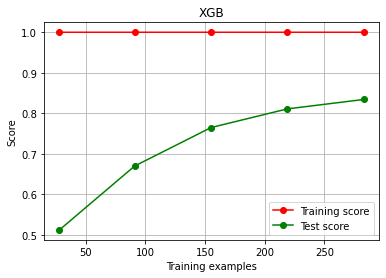

In [28]:
cv = KFold(n_splits=5,shuffle=True,random_state=42)
plot_learning_curve(XGBR(n_estimators=100,random_state=420),"XGB",Xtrain,Ytrain,ax=None,cv=cv)
plt.show()